In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.50.post1', '1.0.1.post2')

In [4]:
torch.cuda.set_device(0)

In [5]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-gujarati/language-model')

In [6]:
from inltk.tokenizer import GujaratiTokenizer

In [7]:
GujaratiTokenizer

inltk.tokenizer.GujaratiTokenizer

In [8]:
# class GujaratiTokenizer(BaseTokenizer):
#     def __init__(self, lang:str):
#         self.lang = lang
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"../tokenizer/gujarati_lm.model"))
        
#     def tokenizer(self, t:str) -> List[str]:
#         return self.sp.EncodeAsPieces(t)

In [9]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/gujarati_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(20000)]

In [16]:
itos

['<unk>',
 '<s>',
 '</s>',
 '.',
 ',',
 '▁છે',
 '▁',
 '▁અને',
 'ની',
 'માં',
 'ના',
 '▁આ',
 'ને',
 '▁જ',
 '▁એક',
 '▁તેમ',
 '▁આવેલા',
 'નો',
 'નું',
 '▁કે',
 '▁ગામમાં',
 '▁ખેતી',
 '▁પણ',
 '▁માટે',
 'થી',
 '▁આવે',
 '▁ભાગમાં',
 '▁કરવામાં',
 '▁તે',
 'ો',
 'ે',
 '▁q',
 '▁�',
 'ી',
 '-',
 '▁ગામ',
 '▁પર',
 '▁હતી',
 '▁ભારત',
 '▁ગુજરાત',
 '▁મુખ્ય',
 '▁જે',
 'X',
 '▁આવેલું',
 '▁હતા',
 '▁સ્થાન',
 'એ',
 '▁એ',
 '▁હતો',
 '▁પશ્ચિમ',
 '▁ડેરી',
 '▁રાજ્યના',
 '▁દેશના',
 '▁ભારતમાં',
 '▁મુખ્યત્વે',
 '▁સાથે',
 '▁શાળા',
 '▁હતું',
 '▁જેવી',
 'ં',
 '▁પ્રાથમિક',
 '▁કરી',
 '▁દૂધ',
 '▁અન્ય',
 '▁પશુપાલન',
 '▁ગામના',
 '▁હોય',
 '▁ખેતમજૂરી',
 '▁આંગણવાડી',
 '▁વ્યવસાય',
 '▁પંચાયતઘર',
 '�',
 '▁પ્રાપ્ય',
 '▁સવલતો',
 '▁તરીકે',
 '▁લોકોનો',
 '▁તાલુકામાં',
 'ગુજરાત',
 '▁જિલ્લામાં',
 '▁પાક',
 '▁દ્વારા',
 '▁કરે',
 '▁થયેલી',
 'ા',
 '▁શાકભાજીના',
 '▁કુલ',
 '▁એવા',
 '▁થાય',
 'ક',
 '▁રીતે',
 'ન',
 'સ',
 '▁બાજરી',
 'ર',
 '▁પૈકીના',
 '▁લોકો',
 '▁કપાસ',
 '▁તેઓ',
 '▁"',
 '▁તાલુકાઓ',
 '▁તેના',
 'નાં',
 '"',
 'લ',
 'ઓ',
 '▁ઘઉં',
 '▁વધુ

In [11]:
# 20,000 is the vocab size that we chose in sentencepiece
gujarati_vocab = Vocab(itos)

In [12]:
tokenizer = Tokenizer(tok_func=GujaratiTokenizer, lang='gu')

In [13]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [14]:
data_lm = TextLMDataBunch.from_folder(path=path/'GujaratiDataset', tokenizer=tokenizer, vocab=gujarati_vocab)

In [15]:
data_lm.batch_size

64

In [16]:
data_lm.save()

In [23]:
data_lm.show_batch()

idx,text
0,"▁x x bo s ▁ગુજરાત ▁અને ▁ભારતમાં ▁સ્થાન ▁પ નાર ▁ભારત ▁દેશના ▁પશ્ચિમ ▁ભાગમાં ▁આવેલા ▁ગુજરાત ▁રાજ્યના ▁મધ્ય ▁ભાગમાં ▁આવેલા ▁અમદાવાદ ▁જિલ્લામાં ▁આવેલા ▁કુલ ▁૧૧ ▁તાલુકાઓ ▁પૈકીના ▁એક ▁એવા ▁દેત્રોજ ▁તાલુકામાં ▁આવેલું ▁એક ▁ગામ ▁છે . ▁પ નાર ▁ગામના ▁લોકોનો ▁મુખ્ય ▁વ્યવસાય ▁ખેતી , ▁ખેતમજૂરી ▁તેમ ▁જ ▁પશુપાલન ▁છે . ▁આ ▁ગામમાં ▁મુખ્યત્વે ▁ઘઉં , ▁જુવાર , ▁બાજરી , ▁કપાસ , ▁દિવેલી ▁તેમ ▁જ ▁શાકભાજીના ▁પાક ની ▁ખેતી ▁કરવામાં ▁આવે"
1,▁પાદરી ▁લા વ્ ▁યો ▁હતો . ▁જયારે ▁જાપાનીઝ ▁સમ્રાટ e mp er or ▁sa ga ▁ચા ના ▁છોડ ▁ઉગાડવા ને ▁પ્રો ત્ ▁સાહ ન ▁આ પ્ ▁ યું ▁ત્ ▁ યાર ▁પછી ▁તે ▁રાજવી ▁વર્ગો નું ▁પીણું ▁બની . ▁ચીનમાં થી ▁બિયારણ ▁આયાત ▁કરવામાં ▁આવ્ ▁યા ▁હતાં ▁અને ▁જાપાનમાં ▁ખેતી ▁શરૂ ▁થઇ ▁હતી . ▁11 91 માં ▁પ્રખ ્ ▁ યાત ▁ઝેન ▁પાદરી ▁ક યો ટો માં ▁ફરી ▁ચા ના
2,"▁પડે ▁છે ▁અને ▁તેની ▁ભંડોળ ▁પ્રક્રિયાઓ ▁પણ ▁મોટાભાગે ▁જટિલ ▁હોય ▁છે , ▁કે ▁તે ▁ભાગીદારો ▁પાસે ▁જાય ▁છે ▁જે ▁જવાબદાર ▁કામગીરી ▁નથી ▁બજાવતા . ▁કેટલાક ▁કિસ્સાઓમાં , ▁ખોટી ▁બજાર ▁અને ▁વ્યવસાયિક ▁પહેલ ને ▁ખોટી ▁જગ્યાએ ▁સસ્તા ▁કે ▁મફત ના ▁નાણાં ▁સાથે ▁મૂકવા થી ▁નબળા ▁વિચાર વાળી ▁યોજના ▁નાણાકીય ▁વ્યવસ્થા ના ▁સમેત ▁વિકાસને ▁અવરોધ તી ▁છે ."" ▁લઘુ ▁ધી ર નાર ▁પર ▁તેવી ▁પણ ▁ટીકા ▁થઇ ▁રહી ▁છે ▁કે ▁તે ▁ગરીબ"
3,"▁વન ▁અને ▁બેંગલોર ▁ટ્રાફિક ▁પોલીસ ે ▁કાર પૂ લિંગ ▁ડ્રાઈવ ની ▁શરૂઆત ▁કરી ▁છે , ▁જેમાં ▁લોકોને ▁કાર પૂ લ ▁માટે ▁પ્રોત્સાહિત ▁કરવા ▁રોબિન ▁ઉ થ પ્પા ▁અને ▁રાહુલ ▁દ્રવિડ ▁જેવી ▁હસ્તીઓ ▁પણ ▁સામેલ ▁છે . ▁આ ▁પહેલ ને ▁સારો ▁એવો ▁આવકાર ▁મળ્યો ▁છે , ▁અને ▁મે - 2009 ના ▁અંત ▁સુધીમાં ▁જ ▁શહેરમાં ▁10,000 ▁લોકો ▁કાર પૂ લ ના ▁હિસ્સેદાર ▁બન્યા ▁હતા . ▁ભારતમાં ▁સૌથી ▁પહેલાં ▁યુ ટિ લિટી"
4,"▁ફૂલો ▁અને ▁છોડો ના ▁મોર માંથી ▁તેને ▁લેવા ના ▁વિકલ્પો ▁શોધી ▁કાઢ્યા ▁છે , ▁કારણ ▁કે ▁તેનો ▁દેખાવ ▁સુંદર ▁અને ▁સુગંધી દાર ▁છે . ▁સમગ્ર ▁વિશ્વમાં ▁લોકો ▁જુદા - જુદા ▁પ્રકારના ▁કાર્યક્રમો ▁અને ▁સમારંભ ોમાં ▁ફૂલો નો ▁ઉપયોગ ▁કરે ▁છે , ▁આમ ▁વ્યક્તિના ▁જીવનકાળ માં ▁કોઈ ને ▁કોઈ ▁રીતે ▁ફૂલો નું ▁સ્થાન ▁તો ▁હોય ▁છે . ▁લોકો ▁તેમના ▁ઘર ની ▁જોડે ▁ફૂલો નું ▁સંવર્ધન ▁કરે ▁છે ▁અને ▁તેમની ▁પાસે ની"


In [17]:
len(data_lm.vocab.itos)

20000

In [25]:
data_lm.vocab.stoi

defaultdict(int,
            {'<unk>': 0,
             '<s>': 1,
             '</s>': 2,
             '.': 3,
             ',': 4,
             '▁છે': 5,
             '▁': 6,
             '▁અને': 7,
             'ની': 8,
             'માં': 9,
             'ના': 10,
             '▁આ': 11,
             'ને': 12,
             '▁જ': 13,
             '▁એક': 14,
             '▁તેમ': 15,
             '▁આવેલા': 16,
             'નો': 17,
             'નું': 18,
             '▁કે': 19,
             '▁ગામમાં': 20,
             '▁ખેતી': 21,
             '▁પણ': 22,
             '▁માટે': 23,
             'થી': 24,
             '▁આવે': 25,
             '▁ભાગમાં': 26,
             '▁કરવામાં': 27,
             '▁તે': 28,
             'ો': 29,
             'ે': 30,
             '▁q': 31,
             '▁�': 32,
             'ી': 33,
             '-': 34,
             '▁ગામ': 35,
             '▁પર': 36,
             '▁હતી': 37,
             '▁ભારત': 38,
             '▁ગુજરાત': 39,
             '▁મુખ્ય':

In [18]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

/home/gaurav/anaconda3/envs/fastai-bleed/lib/python3.6/site-packages/fastai/datasets.py:164: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  with open(fpath, 'r') as yaml_file: return yaml.load(yaml_file)


In [19]:
gc.collect()

49

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


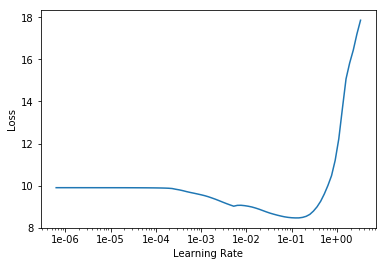

In [83]:
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.414417,4.310761,0.352002


In [30]:
learn.save('first', with_opt=True)

In [20]:
learn.load('first', with_opt=True);

In [32]:
learn.unfreeze()

In [33]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.275380,4.335347,0.347349
2,4.191244,4.267458,0.351355
3,3.778204,4.043843,0.369849
4,3.580361,3.832324,0.395666
5,3.400934,3.772517,0.404236


In [34]:
learn.save('second_gu_lm', with_opt=True)

In [21]:
learn.load('second_gu_lm', with_opt=True);

In [36]:
learn.fit_one_cycle(40, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.411524,3.772024,0.404738
2,3.357055,3.766425,0.405403
3,3.460837,3.759922,0.406366
4,3.488795,3.751363,0.407580
5,3.338342,3.740441,0.409299
6,3.387773,3.732228,0.410783
7,3.284932,3.722899,0.412698
8,3.248866,3.708502,0.414737
9,3.196706,3.695313,0.416932
10,3.133106,3.688690,0.418827


In [37]:
learn.save('third_gu_lm', with_opt=True)

In [22]:
learn.load('third_gu_lm', with_opt=True);

In [23]:
TEXT = "ગુજરાત"
N_WORDS = 40
N_SENTENCES = 2

In [24]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

ગુજરાત ▁અને ▁ભારતમાં ▁સ્થાન ▁દૂધ ની ▁ડેરી ▁કપાસ , ▁દિવેલી , ▁શાકભાજી ▁વા સ રીયા ▁ભારત ▁દેશના ▁પશ્ચિમ ▁ભાગમાં ▁આવેલા ▁ગુજરાત ▁રાજ્યના ▁ઉત્તર ▁ભાગમાં ▁આવેલા ▁મહેસાણા ▁જિલ્લામાં ▁આવેલા ▁કડી ▁તાલુકા નું ▁આવેલું ▁એક ▁ગામ ▁છે . ▁ધ જા પ ▁ગામના ▁લોકોનો
ગુજરાત ▁અને ▁ભારતમાં ▁સ્થાન ▁ડેરી ▁શક્કરીયાં , ▁શાકભાજી ▁જ ખ ખો લી ▁ભારત ▁દેશના ▁પશ્ચિમ ▁ભાગમાં ▁આવેલા ▁ગુજરાત ▁રાજ્યના ▁ઉત્તર ▁ભાગમાં ▁આવેલા ▁મહેસાણા ▁જિલ્લાના ▁મહેસાણા ▁તાલુકામાં ▁આવેલું ▁એક ▁ગામ ▁છે . ▁આ ▁ગામના ▁લોકોનો ▁મુખ્ય ▁વ્યવસાય ▁ખેતી , ▁ખેતમજૂરી ▁તેમ ▁જ


In [41]:
np.exp(3.53)

34.123967614754356

In [25]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [10]:
# Generating embedding vectors for visualization

In [11]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-gujarati/language-model')

In [12]:
defaults.device = torch.device('cpu')

In [14]:
learn = load_learner(path / 'GujaratiDataset/')

In [15]:
encoder = get_model(learn.model)[0]

In [16]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([20000, 400])

In [17]:
embeddings = encoder.state_dict()['encoder.weight']

In [18]:
embeddings = np.array(embeddings)

In [19]:
embeddings[0].shape

(400,)

In [20]:
df = pd.DataFrame(embeddings)

In [21]:
df.shape

(20000, 400)

In [22]:
df.to_csv('embeddings.tsv', sep='\t', index=False, header=False)

In [23]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.252986,0.418611,-0.439029,-0.441049,0.029148,-0.314869,-0.589202,0.111865,0.262992,0.436662,...,-0.154374,0.200869,-0.673178,0.460539,0.419130,-0.108911,0.642514,-0.037938,-0.017808,-0.156264
1,0.078203,0.315014,0.171740,-0.384664,-0.029448,-0.254516,-1.378536,0.129664,0.372344,0.513846,...,-0.379125,0.536381,0.060811,-0.340176,-0.064628,0.037829,-0.307743,0.054480,-0.011230,-0.587717
2,0.109690,0.354721,0.153262,-0.419109,-0.076871,-0.291824,-1.394056,0.149986,0.372318,0.426831,...,-0.380195,0.538865,0.101554,-0.304486,-0.092393,-0.006826,-0.313860,0.078709,-0.054058,-0.631475
3,-1.098308,0.298648,-0.128108,0.032975,-0.682281,-0.390906,-0.456755,-0.257877,-0.039090,0.943857,...,-0.129437,0.350215,-1.101847,-0.515688,0.670768,-0.731523,-1.983206,0.674198,-0.673082,0.720111
4,-0.675954,0.048389,-0.256577,0.662847,-0.771587,0.275673,-0.348075,-0.075907,0.436690,-0.623583,...,0.371649,0.386180,-1.076518,-0.598755,-0.102194,-0.095610,-1.101409,0.494727,0.077708,0.670000


In [24]:
df2 = pd.DataFrame(itos)

In [25]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,.
4,","


In [26]:
df2.shape

(20000, 1)

In [27]:
df2.to_csv('embeddings_metadata.tsv', sep='\t', index=False, header=False)

In [28]:
encoder.state_dict()['encoder.weight'][1]

tensor([ 0.0782,  0.3150,  0.1717, -0.3847, -0.0294, -0.2545, -1.3785,  0.1297,
         0.3723,  0.5138, -0.1738, -0.1976, -0.4043, -0.0243, -0.4031,  0.0869,
        -0.4346,  0.3819, -0.3441, -0.1656,  0.2646,  0.2250,  0.1787, -0.4637,
         0.4719,  0.1534,  0.1702,  0.4582, -0.0048, -0.2773, -0.2362, -0.2701,
         0.2092,  0.0424, -0.0182, -0.4436, -0.2937,  0.2177,  0.1735,  0.1273,
        -0.0022,  0.2535, -0.6525,  0.0380, -0.3795,  0.1339,  0.5349,  0.1912,
         0.1492, -0.1661, -0.1212,  0.0366,  0.3204,  0.2986,  0.3764, -0.0349,
         0.9395, -0.6003,  0.2183,  0.0207,  0.2798, -0.1157,  0.0407, -0.1922,
         0.0359, -0.1317, -0.1564, -0.0444,  0.1443, -0.3196,  0.2052, -0.3808,
         0.0624,  0.3161,  0.2066, -0.0315,  0.1764,  0.0638,  0.1132,  0.6837,
        -0.0548, -0.1835, -0.0711,  0.0444,  0.0940,  0.4127,  0.3209, -0.1138,
        -1.0245,  0.1508,  0.0561, -0.4270,  0.0692,  0.3010, -0.1864,  0.1363,
         0.3164,  0.6040, -0.0038, -0.14